In [3]:
# Import Libraries
import pandas as pd

# Loading the dataset
df = pd.read_csv("walmart_data_cleansed.csv")

# Preview the data
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax_5,Sales,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Standardizing column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Converting 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Confirming the column types
df.dtypes

,0
invoice_id,object
branch,object
city,object
customer_type,object
gender,object
product_line,object
unit_price,float64
quantity,int64
tax_5,float64
sales,float64


In [5]:
# Basic summary statistics
df.describe()

,unit_price,quantity,tax_5,sales,date,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


In [6]:
# Quick facts about the dataset
print("🧾 Total Rows:", df.shape[0])
print("🧾 Total Columns:", df.shape[1])
print("\n📍 Unique Branches:", df['branch'].nunique())
print("📍 Cities:", df['city'].unique())
print("📍 Product Lines:", df['product_line'].unique())
print("📍 Payment Methods:", df['payment'].unique())

🧾 Total Rows: 1000
🧾 Total Columns: 17

📍 Unique Branches: 3
📍 Cities: ['Yangon' 'Naypyitaw' 'Mandalay']
📍 Product Lines: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
📍 Payment Methods: ['Ewallet' 'Cash' 'Credit card']


In [7]:
# Total sales by product line
sales_by_category = df.groupby('product_line')['sales'].sum().sort_values(ascending=False)

# Display result
sales_by_category

,sales
product_line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130
Health and beauty,49193.7390


/tmp/ipython-input-8-3688651746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.values, y=sales_by_category.index, palette="viridis")


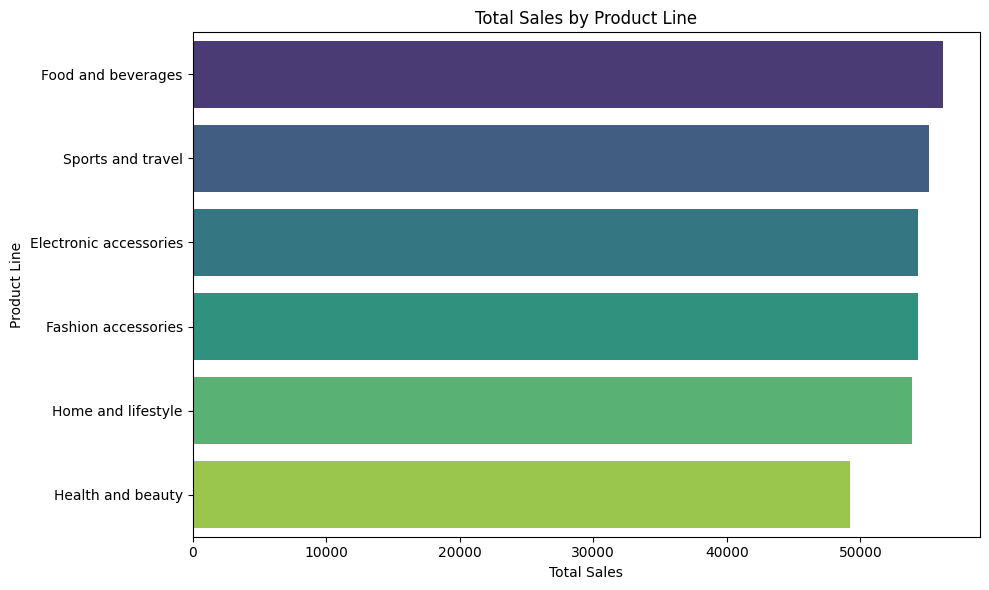

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_category.values, y=sales_by_category.index, palette="viridis")
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()

In [9]:
# Top 5 cities by revenue
city_sales = df.groupby('city')['sales'].sum().sort_values(ascending=False).head(5)

# Display result
city_sales

,sales
city,
Naypyitaw,110568.7065
Yangon,106200.3705
Mandalay,106197.6720


/tmp/ipython-input-10-2425129531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette="coolwarm")


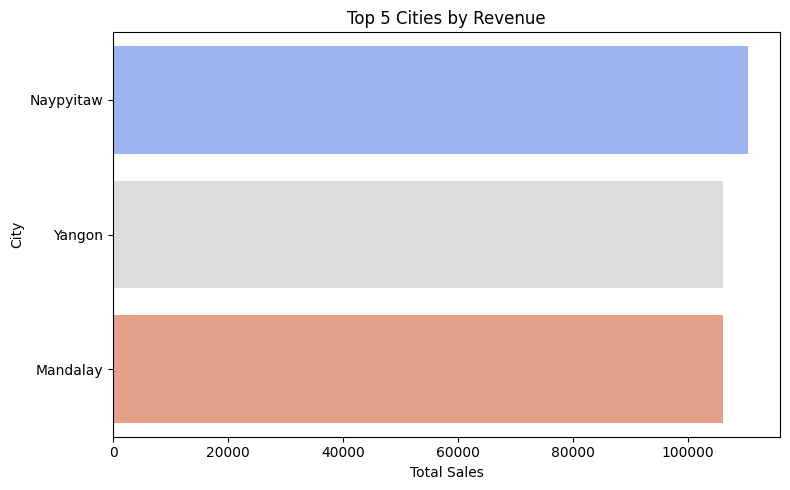

In [10]:
# Plotting bar chart for top 5 cities
plt.figure(figsize=(8,5))
sns.barplot(x=city_sales.values, y=city_sales.index, palette="coolwarm")
plt.title('Top 5 Cities by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

In [11]:
# Count of payment methods
payment_counts = df['payment'].value_counts()

# Show result
payment_counts

,count
payment,
Ewallet,345
Cash,344
Credit card,311


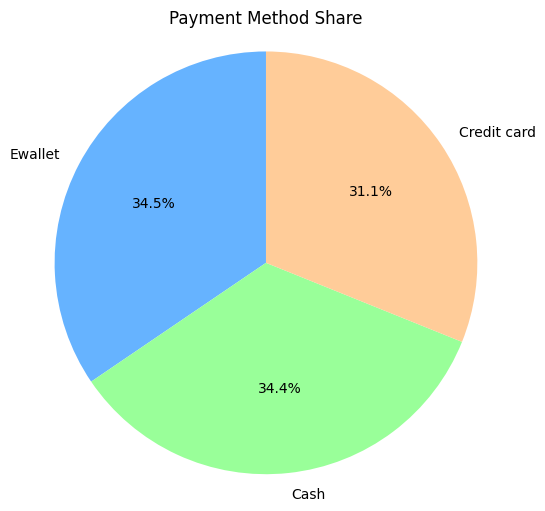

In [12]:
# Plotting pie chart
plt.figure(figsize=(6,6))
colors = ['#66b3ff', '#99ff99', '#ffcc99']  # Custom colors
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Payment Method Share')
plt.axis('equal')  # Keeps the pie circle-shaped
plt.show()